# Notebook 2: Related Features Preparation

## README

### Overview
This notebook explores key spatial datasets related to human activities and infrastructure that may contribute to or correlate with nitrogen dioxide (NO₂) pollution in two case study cities: Addis Ababa, Ethiopia and Baghdad, Iraq. Including:

   - **Point of Interest and Road Network Data**, from Open Street Map for [Ethiopia](https://download.geofabrik.de/africa/ethiopia-latest-free.shp.zip) and [Iraq](https://download.geofabrik.de/asia/iraq-latest-free.shp.zip).
   - **Population Data**: [WorldPop](https://data.humdata.org/search?q=Spatial+Distribution+of+Population+&ext_search_source=main-nav) for population density.
   - **Night Time Light Data**, from [NASA Black Marble](https://blackmarble.gsfc.nasa.gov) for night time light.
   - **Cloud Cover Data**, from [MODIS/Aqua Surface Reflectance](https://lpdaac.usgs.gov/products/myd09a1v061/) for cloud cover.
   - **Land Surface Temperature Data**, from [MODIS/Terra Land Surface Temperature](https://lpdaac.usgs.gov/products/mod11a1v061/) for land surface temperature.
   - **Traffic Congestion Data**, from WorldBank internal source, **only available in Baghdad**.

   - Auxiliary dataset: **Boundary data**, from [HDX](https://data.humdata.org/) for [Ethiopia](https://data.humdata.org/dataset/cod-ab-eth) and [Iraq](https://data.humdata.org/dataset/cod-ab-irq).


### Objective
The main objective of this notebook is to:

- Finish the data processing of different datasets, including missing data filling, clipping to interested area, aggregation and basic visualization.

- Provide mesh-based visualizations of urban-scale features such as population density, road length, and POI distribution, to support future modeling

### Workflow

1. **Data Acquisition**
   - Downloads datasets from multiple sources listed above.

2. **Data Processing**
   - Clips all spatial layers to city-level boundaries. 
   - Aggregates various indicators into uniform mesh grids for spatial comparison.

3. **Visualisation**
   - Generates static maps of population density and road infrastructure distribution.
   - Visualises spatial variation in contributing factors to support exploratory analysis.

4. **Export Results**
   - Save enriched mesh grids with new attributes for modeling and further analysis.

### Data Process Pipeline

The datasets in this notebook are processed through the following steps(similar to the process in notebook1):

- **(1) Filling Missing Value**: Spot the missing values in raster and replenish them using iterative checking, using **mean** of the neighbour raster as the replenish value.

- **(2) Clipping to Region**: Clipping the data to the interested area, and output the filled raster.

- **(3) Aggregation**: Import the generated mesh and aggregate the raster to the mesh level.

- **(4) Visualization**: Visualize the result as static figure [*.png*] or dynamic figure [*.gif*].

### Outputs

- **Processed GeoPackages**: City-level road, POI, and infrastructure layers.
- **Mesh-Based Aggregated Tables**: Feature counts and densities per grid cell.
- **Static Visualisations**: Color maps for all contributing factors to aid spatial interpretation.
- **Harmonised Datasets**: All outputs aligned spatially and ready for merging with NO₂ concentration data.



## 0 Init: Prepare Packages and Configuration

Get current file/repo/data path in local to make sure the following cells run properly.

In [ ]:
import sys
from pathlib import Path

SRC_PATH = Path().resolve().parent / "src"
sys.path.append(str(SRC_PATH))
from config import *
from missingvalue import*
from visualization import*
from aggregation import*
from osmstats import*
from helpercollections import*

## 1 OSM Data

This chapter is used to enrich spatial mesh grids with OpenStreetMap (OSM) data and visualise selected indicators such as POI density, road length, and land-use area.

Note:

* A predefined set of eight POI types (e.g., supermarket, hospital) and six land-use classes (e.g., industrial, residential) are used to filter relevant OSM content.

* OSM enrichment is performed at the mesh level using a batch processing pipeline, resulting in hundreds of `.gpkg` files for each day.

* Static maps are generated to visualise aggregated metrics such as POI share, road length, and industrial land area in square metres.

* These outputs provide spatial insight into the built environment and urban function of regions like Addis Ababa.


#### Ethiopia - Addis Ababa

Define static OSM parameters

In [ ]:
# Eight relevant POIs
relevant_poi = [
    "supermarket",
    "hospital",
    "car_dealership",
    "car_rental",
    "car_wash",
    "marketplace",
    "mall",
    "university"
]

# Land‐use categories of interest
landuse_classes = [
    "industrial",
    "commercial",
    "residential",
    "retail",
    "farmland",
    "farmyard"
]

Paths for Addis Ababa

In [ ]:
addis_mesh_in  = DATA_PATH / "addis-empty-mesh-data"
addis_mesh_out = DATA_PATH / "addis-OSM-mesh-data"
addis_osm      = DATA_PATH / "OSM" / "ethiopia-latest-free.shp"
ethiopia_pp_path = DATA_PATH / "Power Plants" / "ethiopia_power_fossil.gpkg"

Enrich Addis Ababa — writes ~730 files to addis-OSM-mesh-data

In [ ]:
batch_write(
    city="addis",
    mesh_folder_in=addis_mesh_in,
    mesh_folder_out=addis_mesh_out,
    osm_shapefile=addis_osm,
    relevant_poi=relevant_poi,
    landuse_classes=landuse_classes,
    fossil_pp_path=ethiopia_pp_path
)

Cell “Plot the 2023-01-01 Demo Mesh for QA”

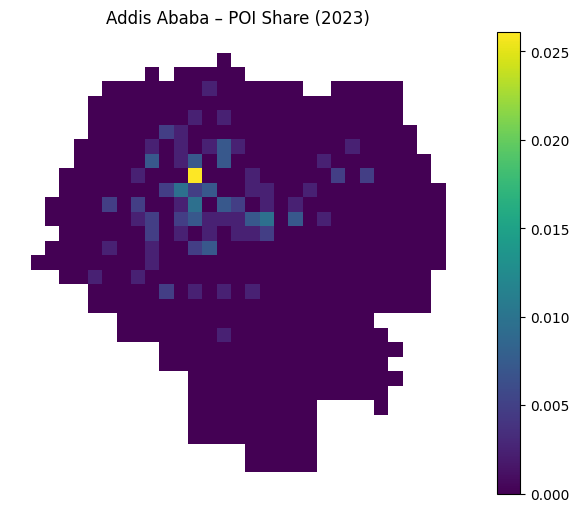

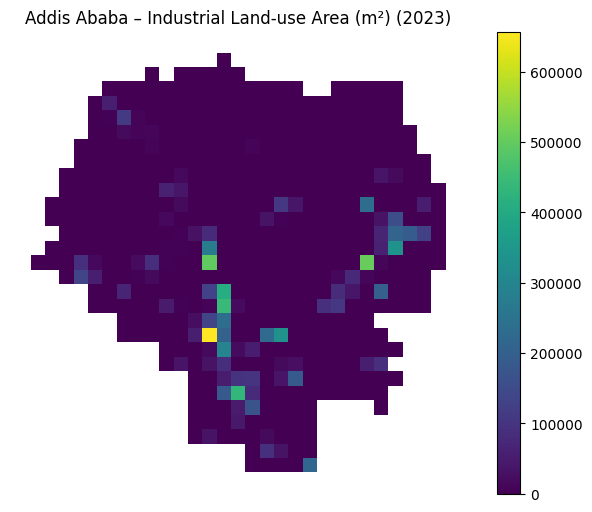

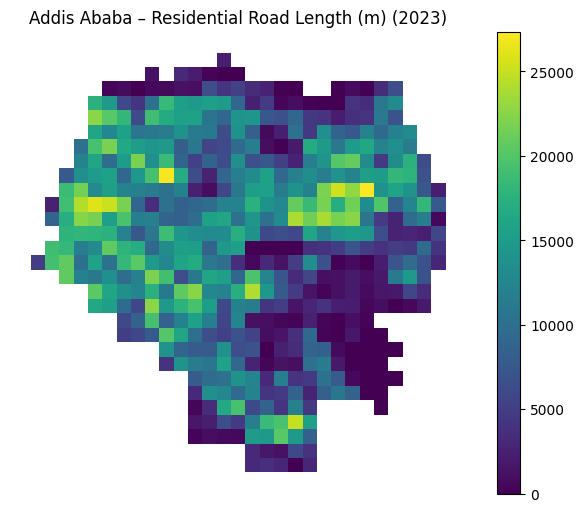

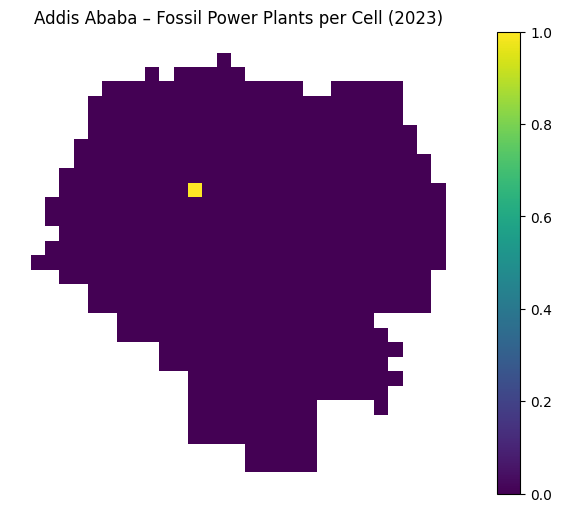

<Axes: title={'center': 'Addis Ababa – Fossil Power Plants per Cell (2023)'}>

In [ ]:
demo_dir = DATA_PATH / "demo-data"
#  → “addis-2023-01-01.gpkg” and “baghdad-2023-01-01.gpkg” now exist

# ─── Load the single Addis mesh for QA ────────────────────────────────────────
gdf_addis = gpd.read_file(demo_dir / "addis-ababa-2023-01-01.gpkg")

# POI Share
plot_mesh(
    mesh    = gdf_addis,
    feature = "poi_share",
    title   = "Addis Ababa – POI Share (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# Industrial Land‐use Area
plot_mesh(
    mesh    = gdf_addis,
    feature = "lu_industrial_area",
    title   = "Addis Ababa – Industrial Land‐use Area (m²) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: Residential Road Length ───────────────────────────────────────────
plot_mesh(
    mesh    = gdf_addis,
    feature = "road_residential_len",
    title   = "Addis Ababa – Residential Road Length (m) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: # of Fossil Power Plants per Cell ─────────────────────────────────
plot_mesh(
    mesh    = gdf_addis,
    feature = "fossil_pp_count",
    title   = "Addis Ababa – Fossil Power Plants per Cell (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

#### Iraq - Baghdad

Paths for Baghdad

In [ ]:
# -----------------------------------------------------------------------------
# PATHS FOR BAGHDAD
# -----------------------------------------------------------------------------
baghdad_mesh_in  = DATA_PATH / "baghdad-empty-mesh-data"
baghdad_mesh_out = DATA_PATH / "baghdad-OSM-mesh-data"
baghdad_osm      = DATA_PATH / "OSM" / "iraq-latest-free.shp"
iraq_pp_path     = DATA_PATH / "Power Plants" / "iraq_power_fossil.gpkg"

Enrich Baghdad — writes ~730 files to baghdad-OSM-mesh-data

In [ ]:
batch_write(
    city="baghdad",
    mesh_folder_in=baghdad_mesh_in,
    mesh_folder_out=baghdad_mesh_out,
    osm_shapefile=baghdad_osm,
    relevant_poi=relevant_poi,
    landuse_classes=landuse_classes,
    fossil_pp_path=iraq_pp_path
)

Plot demo mesh for 2023 (already written in `data/demo-data`)

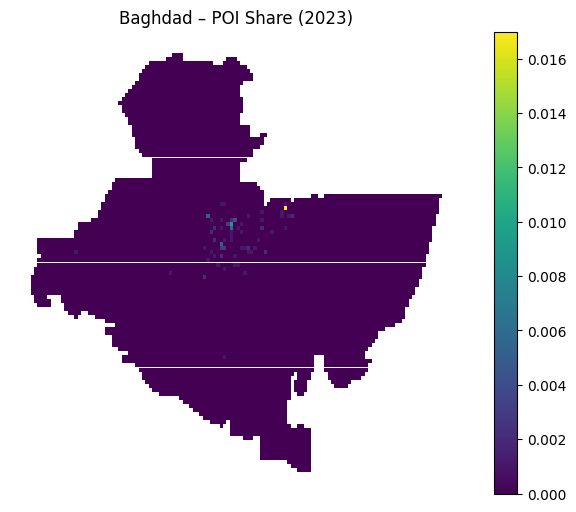

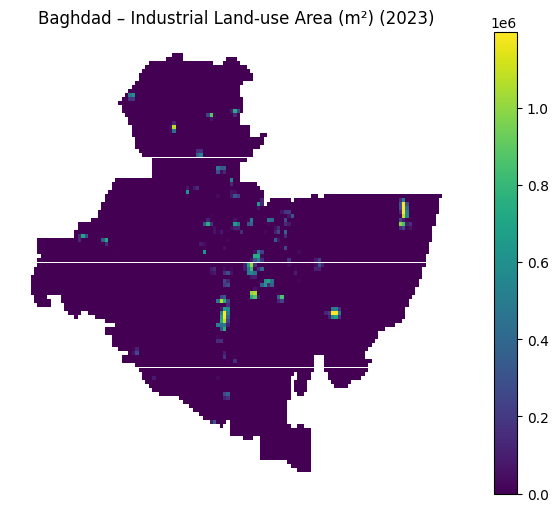

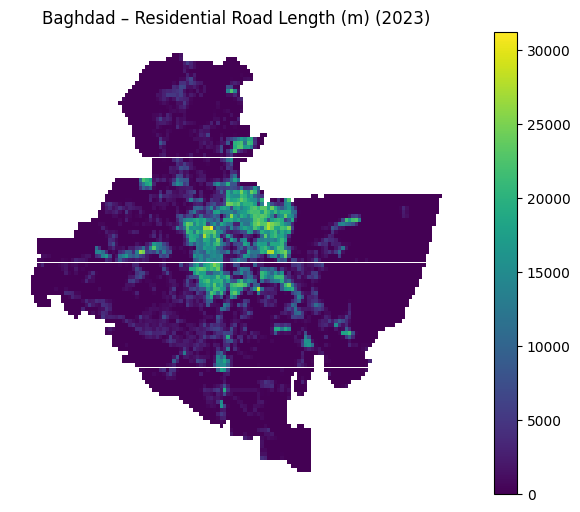

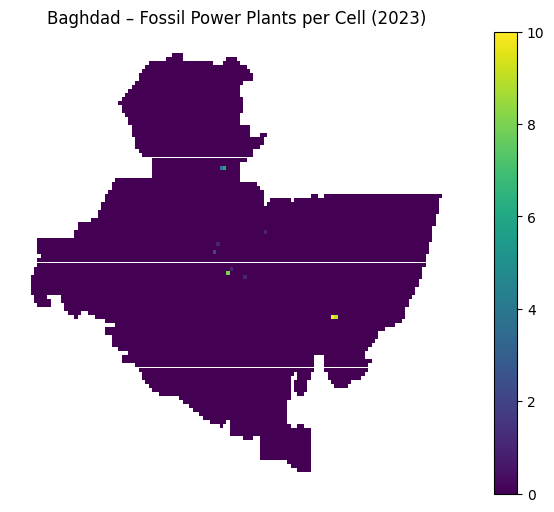

<Axes: title={'center': 'Baghdad – Fossil Power Plants per Cell (2023)'}>

In [ ]:
# ─── Load the single Baghdad mesh ────────────────────────────────────────────
gdf_bag = gpd.read_file(demo_dir / "baghdad-2023-01-01.gpkg")

# POI Share
plot_mesh(
    mesh    = gdf_bag,
    feature = "poi_share",
    title   = "Baghdad – POI Share (2023)",
    figsize = (8, 6),
    show    = True, 
    cmap    = "viridis",
    show_edges=False
)

# Industrial Land‐use Area
plot_mesh(
    mesh    = gdf_bag,
    feature = "lu_industrial_area",
    title   = "Baghdad – Industrial Land‐use Area (m²) (2023)",
    figsize = (8, 6),
    show    = True, 
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: Residential Road Length ───────────────────────────────────────────
plot_mesh(
    mesh    = gdf_bag,
    feature = "road_residential_len",
    title   = "Baghdad – Residential Road Length (m) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# ─── NEW: # of Fossil Power Plants per Cell ─────────────────────────────────
plot_mesh(
    mesh    = gdf_bag,
    feature = "fossil_pp_count",
    title   = "Baghdad – Fossil Power Plants per Cell (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)


## 2 Population Data

This chapter is used to aggregate and visualise population distribution in different regions using mesh grids.

Note:

* The population data is aggregated based on predefined hexagonal or square mesh grids using zonal statistics.

* Yearly aggregated population values are stored as `.gpkg` files, with one file for each day to support temporal analysis.

* Static maps are generated to visualise the spatial distribution of population across the mesh in each year.

* The workflow supports comparison across multiple years (e.g., 2023 and 2024), enabling temporal change analysis.

In [ ]:
# ------------------------------------------------------------------------------
# INITIALISE MESH PATHS AND READ GPKG LAYERS
# ------------------------------------------------------------------------------
import fiona

addis_meshes_path = DATA_PATH / 'addis-mesh-data'       # path to folder storing Addis mesh files
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'   # path to folder storing Baghdad mesh files

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"     # full path to Addis Ababa mesh grid file
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"       # full path to Baghdad mesh grid file

lyr_addis_name = fiona.listlayers(mesh_addis)[0]        # extract the only layer name in the Addis GPKG
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]    # extract the only layer name in the Baghdad GPKG

#### Ethiopia - Addis Ababa

In [ ]:
output_root = DATA_PATH / "eth-pop-gpkg"          # path for saving the data
eth_pop_path = DATA_PATH / 'eth-pop'

aggregate_pop_data(
    data_tiff_path=eth_pop_path,
    mesh_path=mesh_addis,
    layer_name=lyr_addis_name,
    agg_type="sum",
    feature_col="pop_sum_m",
    output_path=output_root
)

Currently working on: 1/2, Year: 2023
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\eth-pop-gpkg\pop_aggregated_2023.gpkg
Currently working on: 2/2, Year: 2024
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\eth-pop-gpkg\pop_aggregated_2024.gpkg


In [ ]:
# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2023_eth = [f for f in addis_meshes_path.glob("*.gpkg") if "2023" in f.name]
print(f"There are {len(gpkg_files_2023_eth)} files from the year 2023.")

# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2024_eth = [f for f in addis_meshes_path.glob("*.gpkg") if "2024" in f.name]
print(f"There are {len(gpkg_files_2024_eth)} files from the year 2024.")

There are 365 files from the year 2023.
There are 366 files from the year 2024.


In [ ]:
# Input file paths
src_2023_eth = DATA_PATH / "eth-pop-gpkg" / "pop_aggregated_2023.gpkg"
src_2024_eth = DATA_PATH / "eth-pop-gpkg" / "pop_aggregated_2024.gpkg"

# Output directory 
output_path = DATA_PATH

# Run for 2023 and 2024
generate_daily_files(src_2023_eth, 2023, 365, "addis-ababa", output_path)
generate_daily_files(src_2024_eth, 2024, 366, "addis-ababa", output_path)

Done: 365 files created for 2023.
Done: 366 files created for 2024.


**Visualisation**

Show aggregated result in 2023 and 2024 for Addis Ababa.

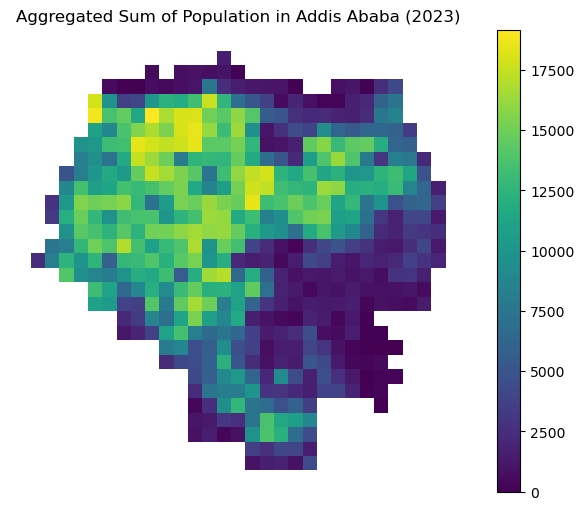

In [ ]:

pop_2023_eth = gpd.read_file(DATA_PATH / "pop-files-addis-ababa" / "addis-ababa-2023-02-21.gpkg")
plot_mesh(mesh=pop_2023_eth, feature="pop_sum_m", title="Aggregated Sum of Population in Addis Ababa (2023)", show_edges=False)
plt.show()

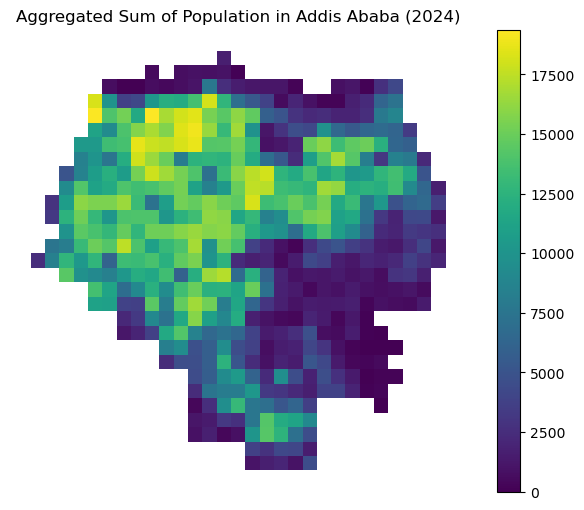

In [ ]:
pop_2024_eth = gpd.read_file(DATA_PATH / "pop-files-addis-ababa" / "addis-ababa-2024-02-21.gpkg")
plot_mesh(mesh=pop_2024_eth, feature="pop_sum_m", title="Aggregated Sum of Population in Addis Ababa (2024)", show_edges=False)
plt.show()

#### Iraq - Baghdad

In [ ]:
output_root = DATA_PATH / "iraq-pop-gpkg"          # path for saving the data
iraq_pop_path = DATA_PATH / 'iraq-pop'

aggregate_pop_data(
    data_tiff_path=iraq_pop_path,
    mesh_path=mesh_baghdad,
    layer_name=lyr_baghdad_name,
    agg_type="sum",
    feature_col="pop_sum_m",
    output_path=output_root
)

Currently working on: 1/2, Year: 2023
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\iraq-pop-gpkg\pop_aggregated_2023.gpkg
Currently working on: 2/2, Year: 2024
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\iraq-pop-gpkg\pop_aggregated_2024.gpkg


In [ ]:
# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2023_iraq = [f for f in baghdad_meshes_path.glob("*.gpkg") if "2023" in f.name]
print(f"There are {len(gpkg_files_2023_iraq)} files from the year 2023.")

# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2024_iraq = [f for f in baghdad_meshes_path.glob("*.gpkg") if "2024" in f.name]
print(f"There are {len(gpkg_files_2024_iraq)} files from the year 2024.")

There are 365 files from the year 2023.
There are 366 files from the year 2024.


In [ ]:
# Input file paths
src_2023_iraq = DATA_PATH / "iraq-pop-gpkg" / "pop_aggregated_2023.gpkg"
src_2024_iraq = DATA_PATH / "iraq-pop-gpkg" / "pop_aggregated_2024.gpkg"

# Output directory 
output_path = DATA_PATH 

# Run for 2023 and 2024
generate_daily_files(src_2023_iraq, 2023, 365, "baghdad", output_path)
generate_daily_files(src_2024_iraq, 2024, 366, "baghdad", output_path)

Done: 365 files created for 2023.
Done: 366 files created for 2024.


**Visualisation**

Show aggregated result in 2023 and 2024 for Baghdad.

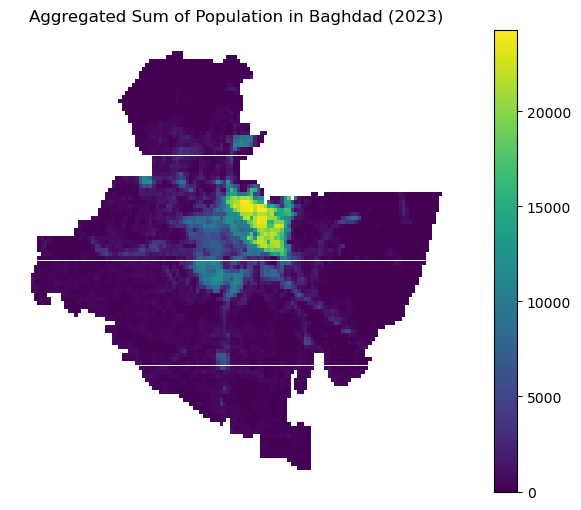

In [ ]:
pop_2023_iraq = gpd.read_file(DATA_PATH / "pop-files-baghdad" / "baghdad-2023-02-21.gpkg")
plot_mesh(mesh=pop_2023_iraq, feature="pop_sum_m", title="Aggregated Sum of Population in Baghdad (2023)", show_edges=False)
plt.show()

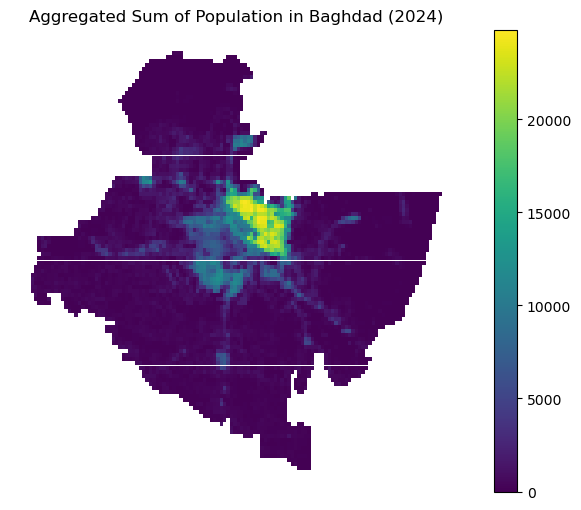

In [ ]:
pop_2024_iraq = gpd.read_file(DATA_PATH / "pop-files-baghdad" / "baghdad-2024-02-21.gpkg")
plot_mesh(mesh=pop_2024_iraq, feature="pop_sum_m", title="Aggregated Sum of Population in Baghdad (2024)", show_edges=False)
plt.show()

## 3 Night Time Light

In this chapter, the effects of night time lights on economic activity are considered. Mellander et al.(2015) used the average light value from all the NTL pixels that overlapped with a given analysis unit.

A similar approach is used here, where the average night time light internsity per cell mesh is calculated.Average night time light is used since NaN values exist in the dataset, which gives more reliable and interpretable information than the total amount of light in a region.

The calculated new feature is stored under the column "NTL_mean".

In [2]:
import rasterio
from aggregation import*
import fiona

output_path = DATA_PATH
addis_meshes_path = DATA_PATH / 'addis-mesh-data'
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"

lyr_addis_name = fiona.listlayers(mesh_addis)[0]         # control layer number = 1 
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]

#### Ethiopia - Addis Ababa

Clip the raster to interested area.

In [ ]:
min_lon, max_lon = 38.65, 39.05
min_lat, max_lat = 8.8, 9.1

addis_ntl_tiff = DATA_PATH / "addis-ababa-NTL-tiffs"
clip_tiff_by_bbox('addis-ababa', addis_ntl_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

Fill the missing data in the raster.

In [ ]:
addis_ntl_clipped = DATA_PATH / "addis-ababa-NTL-clipped"

fill_ntl_missing_data(
    city = 'addis-ababa',
    data_tiff_path = addis_ntl_clipped,
    output_path = DATA_PATH,
)

Generate TIFF Animation

Scanning percentiles: 100%|██████████| 731/731 [00:06<00:00, 110.52it/s]


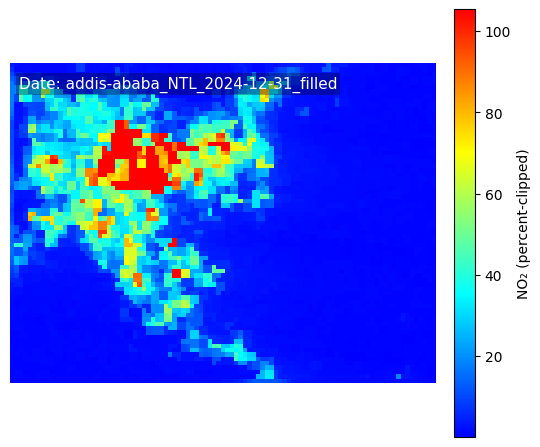

Animation saved to: D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\animation-output\addis-ababa-NTL-animation.gif


In [ ]:
addis_ntl_tif_dir = DATA_PATH / 'addis-ababa-NTL-filled'  
tiff_2_gif(addis_ntl_tif_dir, output_path=DATA_PATH, output_name="addis-ababa-NTL-animation", fps = 8)

Aggregate to Mesh

In [ ]:
# Aggregate Ethiopia - Addis Ababa
addis_ntl_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
aggregate_data(
    data_tiff_path=addis_ntl_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="NTL_mean"
    )

#### Iraq - Baghdad

Clip the raster to interested area.

In [ ]:
min_lon, max_lon = 43.7, 45.0
min_lat, max_lat = 32.7, 33.8

baghdad_ntl_tiff = DATA_PATH / "baghdad-NTL-tiffs"
clip_tiff_by_bbox('baghdad', baghdad_ntl_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

Fill the missing data in the raster.

In [ ]:
baghdad_ntl_clipped = DATA_PATH / "baghdad-NTL-clipped"

fill_ntl_missing_data(
    city = 'baghdad',
    data_tiff_path = baghdad_ntl_clipped,
    output_path = DATA_PATH,
)

Generate TIFF Animation

Scanning percentiles: 100%|██████████| 701/701 [00:07<00:00, 88.71it/s]


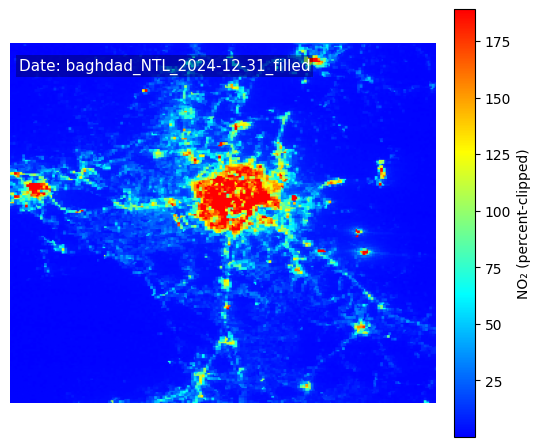

Animation saved to: D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\animation-output\baghdad-NTL-animation.gif


In [ ]:
baghdad_ntl_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
tiff_2_gif(baghdad_ntl_tif_dir, output_path=DATA_PATH, output_name="baghdad-NTL-animation", fps = 8)

Aggregate to Mesh

In [ ]:
# Aggregate Ethiopia - Addis Ababa
baghdad_ntl_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
aggregate_data(
    data_tiff_path=baghdad_ntl_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="NTL_mean"
    )

## 4 Cloud Cover

**Cloud-category gaps.**
Cloud cover category is a label—clear, partly cloudy, mixed—not a number, so averaging would be meaningless. Instead, we look at the which label appears most often in the mesh cell for which the missing pixel is located. That majority label becomes the stand-in for any missing pixel. This “popular vote” preserves the discrete nature of the data.

#### Ethiopia - Addis Ababa

In [ ]:
output_path = DATA_PATH
addis_meshes_path = DATA_PATH / 'addis-mesh-data'
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"

lyr_addis_name = fiona.listlayers(mesh_addis)[0]         # control layer number = 1 
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]

Clip

In [ ]:
min_lon, max_lon = 38.65, 39.05
min_lat, max_lat = 8.8, 9.1

In [ ]:
addis_cloud_tiff = data_folder = "../data/Cloud_AddisAbaba" 
clip_cloud_tiff_by_bbox('addis-ababa', addis_cloud_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

Fill cloud missing data

In [ ]:
addis_cloud_clipped = DATA_PATH / "addis-ababa-cloud-clipped"

fill_cloud_missing_data(
    city = 'addis-ababa',
    data_tiff_path = addis_cloud_clipped,
    output_path = DATA_PATH,
)

Visualisation

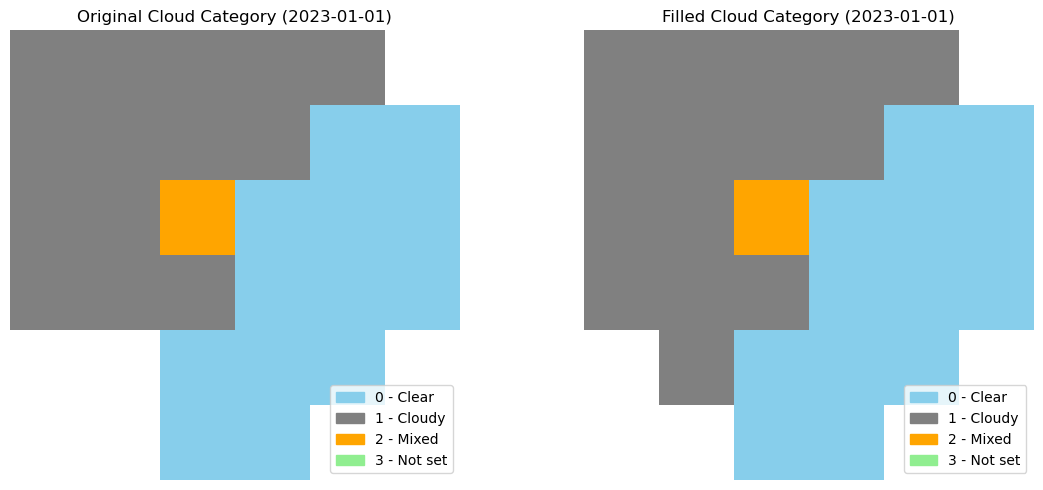

In [ ]:
import matplotlib.pyplot as plt
import rasterio

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original cloud category raster

with rasterio.open(DATA_PATH / 'addis-ababa-cloud-clipped/CloudState_Addis-Ababa_20230101.tif') as src1:
    cloud_arr1 = src1.read(1)
    nodata = src1.nodata  # Get nodata value from the raster metadata
    plot_cloud_category_raster(
        arr=cloud_arr1,
        title="Original Cloud Category (2023-01-01)",
        ax=axes[0],
        nodata_value=nodata
    )

# Filled cloud category raster
with rasterio.open(DATA_PATH / 'addis-ababa-cloud-filled/addis-ababa_cloud_2023-01-01_alltouched_crop.tif') as src2:
    cloud_arr2 = src2.read(1)
    nodata2 = src2.nodata
    plot_cloud_category_raster(
        arr=cloud_arr2,
        title="Filled Cloud Category (2023-01-01)",
        ax=axes[1],
        nodata_value=nodata2
    )

plt.tight_layout()
plt.show()


Animation

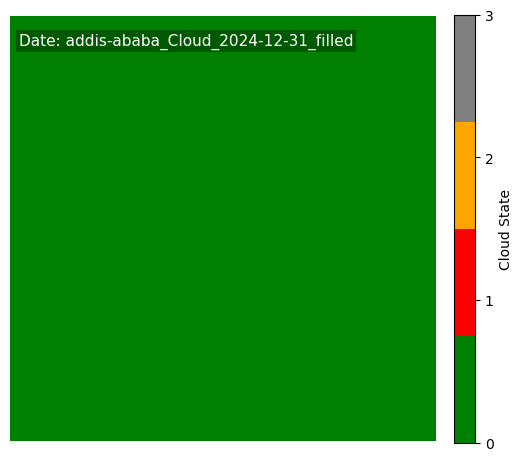

GIF saved to: /Users/ll/Documents/GitHub/air-pollution-mobility-research-project/data/animation-output/addis-ababa-cloud-animation.gif


In [ ]:
addis_cloud_tif_dir = DATA_PATH / 'addis-ababa-cloud-filled'  
tiff_2_gif_cloud(addis_cloud_tif_dir, output_path=DATA_PATH, output_name="addis-ababa-cloud-animation", fps = 8)

In [ ]:
addis_cloud_tif_dir = DATA_PATH / 'addis-ababa-cloud-filled'  

aggregate_cloud_data(
    data_tiff_path=addis_cloud_tif_dir, 
    mesh_path=addis_meshes_path, 
    layer_name=lyr_addis_name,
    feature_name="cloud_category"
)

Visualisation

The result of aggregation in shown below, taking 01/01/2023 as an example:

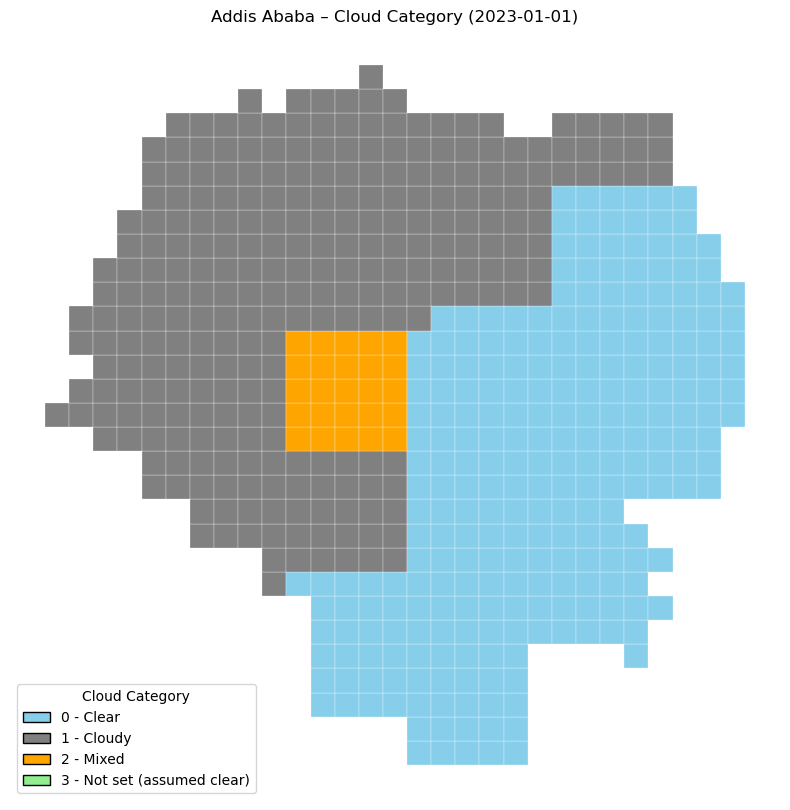

In [ ]:
addis_mesh_grid = DATA_PATH / "addis-cloud-data/addis-ababa-2023-01-01.gpkg"
plot_cloud_category(addis_mesh_grid, title="Addis Ababa – Cloud Category (2023-01-01)")

#### Iraq - Baghdad

Clip

In [ ]:
min_lon, max_lon = 43.7, 45.0
min_lat, max_lat = 32.7, 33.8

In [ ]:
baghdad_cloud_tiff = "../data/Cloud_Baghdad" 
clip_cloud_tiff_by_bbox('baghdad', baghdad_cloud_tiff, output_path,
                    min_lon, min_lat, max_lon, max_lat,)

Fill cloud missing data

In [ ]:
baghdad_cloud_clipped = DATA_PATH / "baghdad-cloud-clipped"

fill_cloud_missing_data(
    city = 'baghdad',
    data_tiff_path = baghdad_cloud_clipped,
    output_path = DATA_PATH,
)

Visualisation

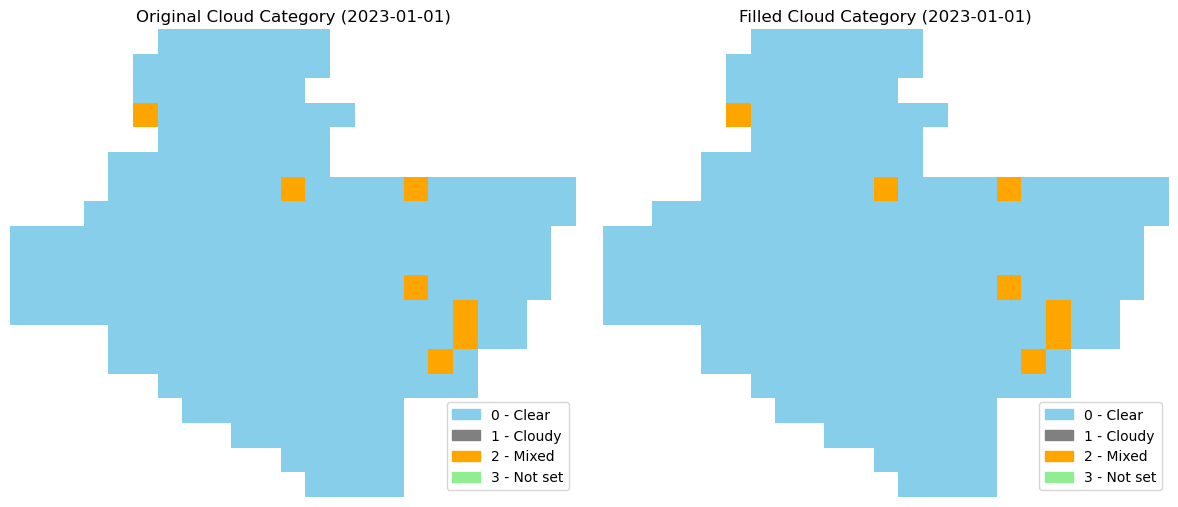

In [ ]:
import matplotlib.pyplot as plt
import rasterio

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# === Read original filled raster ===

with rasterio.open(DATA_PATH / 'baghdad-cloud-clipped/CloudState_Baghdad_20230101.tif') as src1:
    cloud_arr1 = src1.read(1)
    nodata = src1.nodata  # Get nodata value from the raster metadata
    plot_cloud_category_raster(
        arr=cloud_arr1,
        title="Original Cloud Category (2023-01-01)",
        ax=axes[0],
        nodata_value=nodata
    )

# === Read cropped raster ===
with rasterio.open(DATA_PATH / 'baghdad-cloud-filled/baghdad_cloud_2023-01-01_alltouched_crop.tif') as src2:
    cloud_arr2 = src2.read(1)
    nodata2 = src2.nodata
    plot_cloud_category_raster(
        arr=cloud_arr2,
        title="Filled Cloud Category (2023-01-01)",
        ax=axes[1],
        nodata_value=nodata2
    )

plt.tight_layout()
plt.show()


Animation

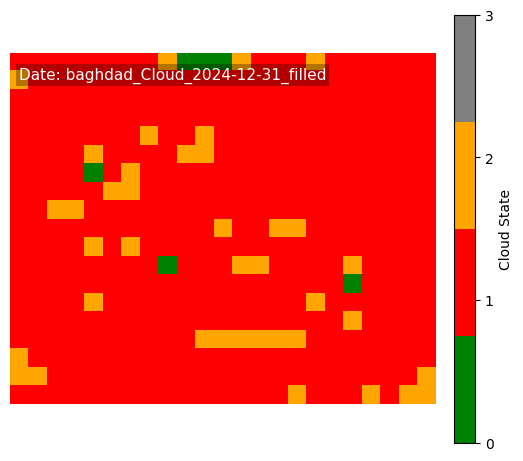

GIF saved to: /Users/ll/Documents/GitHub/air-pollution-mobility-research-project/data/animation-output/baghdad-cloud-animation.gif


In [ ]:
baghdad_cloud_tif_dir = DATA_PATH / 'baghdad-cloud-filled'  
tiff_2_gif_cloud(baghdad_cloud_tif_dir, output_path=DATA_PATH, output_name="baghdad-cloud-animation", fps = 8)

Aggregate

In [ ]:
# Aggregate Iraq - Baghdad
baghdad_cloud_tif_dir = DATA_PATH / "baghdad-cloud-filled"

aggregate_cloud_data(
    data_tiff_path=baghdad_cloud_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="cloud_category"
)

**Visualisation**

The result of aggregation in shown below, taking 2023-01-01 as an example:

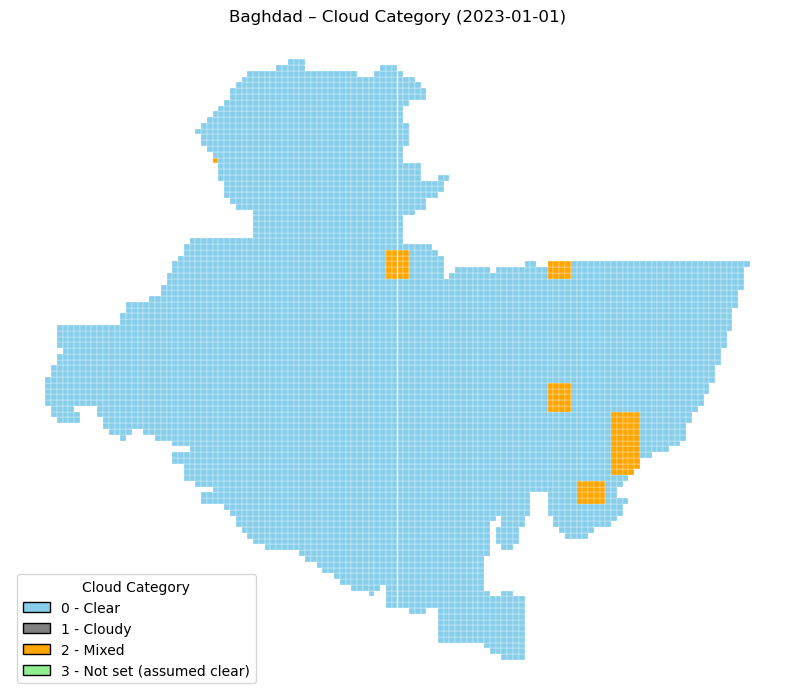

In [ ]:
baghdad_mesh_grid = DATA_PATH / "baghdad-cloud-data/baghdad-2023-01-01.gpkg"
plot_cloud_category(baghdad_mesh_grid,title="Baghdad – Cloud Category (2023-01-01)")

## 5 Land Surface Temperature

This chapter is used to aggregate and visualise land surface temperature distribution in different regions using mesh grids.

**Temperature gaps.**  

Iterative interpolation is used for filling missing pixels by estimating values based on neighboring known data. The process begins by identifying missing or invalid pixels (e.g., due to cloud cover or sensor noise), and then repeatedly applying spatial interpolation methods using surrounding valid temperature values to estimate each missing point. In each iteration, the algorithm updates the image by filling in a subset of missing values, gradually improving the accuracy of the reconstructed temperature field. Over multiple iterations, previously estimated pixels contribute to filling in remaining gaps, allowing the interpolation to converge toward a consistent and spatially smooth temperature surface. This method keeps the natural rise-and-fall pattern intact without inventing any unrealistic spikes.

#### Ethiopia - Addis Ababa **Satellite Aqua**

In [ ]:
# Step 1: Clip raw LST TIFFs to bounding box
min_lon, max_lon = 38.65, 39.05
min_lat, max_lat = 8.8, 9.1

lst_raw_path = DATA_PATH / "Surface-temperature-addis-ababa"
lst_clipped_path = clip_tiff_with_bbox(
    city="addis-ababa",
    data_tiff_path=lst_raw_path,
    output_path=DATA_PATH,
    min_lon=min_lon,
    min_lat=min_lat,
    max_lon=max_lon,
    max_lat=max_lat
)

# Step 2: Fill missing values in clipped TIFFs
iterative_fill_surface_temperature_data(
    city="addis-ababa",
    data_tiff_path=lst_clipped_path,
    output_path=DATA_PATH
)

In [ ]:
# Step 3: Rename TIFFs to match mesh naming format
revert_tiff_filenames_to_match_mesh(DATA_PATH / "addis-ababa-LST-filled")

# Step 4: Aggregate daily LST data to mesh
batch_aggregate_LST(
    tiff_folder=DATA_PATH / "addis-ababa-LST-filled",
    mesh_folder=DATA_PATH / "addis-ababa-LST-mesh-data",
    batch_size=50
)

Saved image to: MODIS_LST_comparison_2023_01_02.png


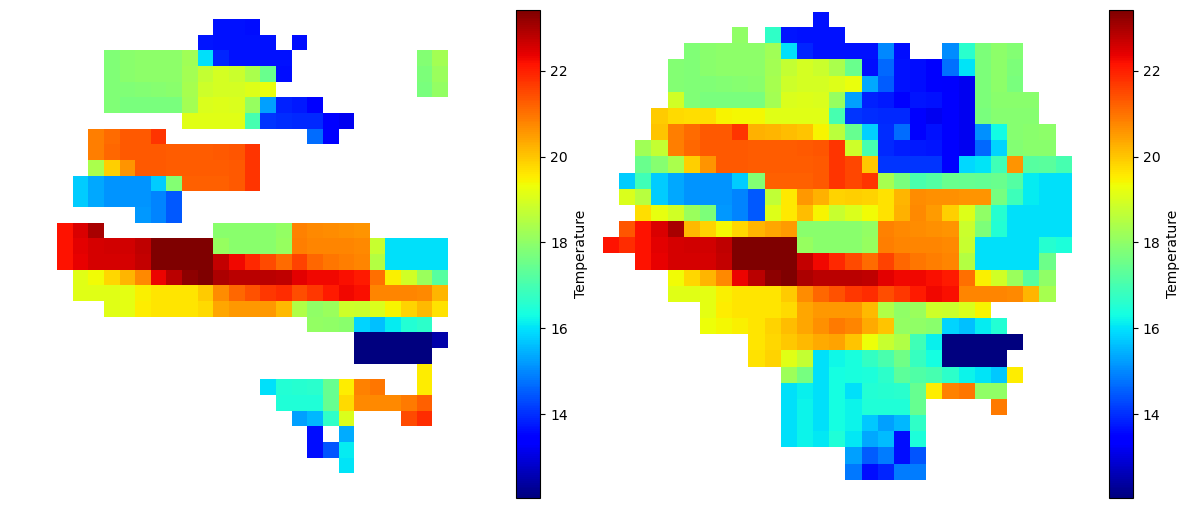

In [ ]:
# Step 5: Plot comparison image (original vs filled)
plot_filled_vs_original_raster(
    original_tif=DATA_PATH / "Surface-temperature-addis-ababa/MODIS_LST_Day_2023_01_03.tif",
    filled_tif=DATA_PATH / "addis-ababa-LST-filled/addis-ababa_LST_2023-01-03_filled.tif",
    shapefile=DATA_PATH / "demo-data/addis-ababa-boundary/addis-ababa-adm1.shp",
    output_image=DATA_PATH / "Surface-temperature-addis-ababa/MODIS_LST_comparison_2023_01_02.png"
)

In [ ]:
# Step 6: Generate animated GIF from daily mesh data
generate_LST_mesh_animation(
    data_folder=DATA_PATH / "addis-ababa-LST-mesh-data",
    output_gif=DATA_PATH / "animation-output/addis_2023_LST.gif",
    layer_name="LST_day",
    column_name="LST_day_mean",
    cmap="YlOrRd",
    dpi=100,
    fps=6
)

#### Iraq - Baghdad **Satellite Aqua**

In [ ]:
# Step 1: Clip raw LST TIFFs to bounding box
min_lon, max_lon = 43.7, 45.0
min_lat, max_lat = 32.7, 33.8

lst_raw_path = DATA_PATH / "Surface-temperature-baghdad"
lst_clipped_path = clip_tiff_with_bbox(
    city="baghdad",
    data_tiff_path=lst_raw_path,
    output_path=DATA_PATH,
    min_lon=min_lon,
    min_lat=min_lat,
    max_lon=max_lon,
    max_lat=max_lat
)

# Step 2: Fill missing values in clipped TIFFs
iterative_fill_surface_temperature_data(
    city="baghdad",
    data_tiff_path=lst_clipped_path,
    output_path=DATA_PATH
)

# Step 3: Rename TIFFs to match mesh naming format
revert_tiff_filenames_to_match_mesh(DATA_PATH / "baghdad-LST-filled")


In [ ]:
# Step 4: Aggregate daily LST data to mesh
batch_aggregate_LST(
    tiff_folder=DATA_PATH / "baghdad-LST-filled",
    mesh_folder=DATA_PATH / "baghdad-LST-mesh-data",
    batch_size=50
)

Saved image to: MODIS_LST_comparison_2023_01_01.png


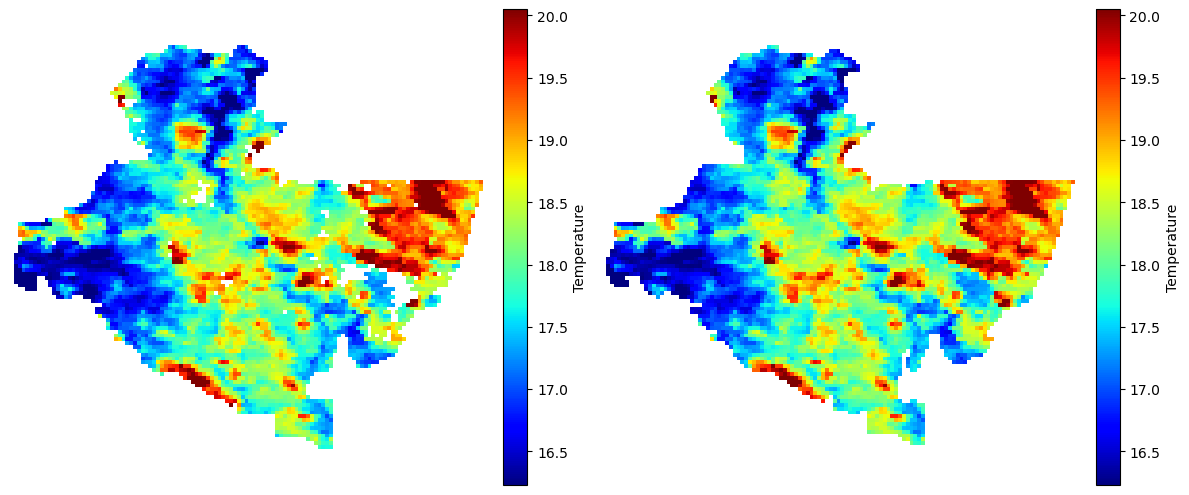

In [ ]:
# Step 5: Plot comparison image (original vs filled)
plot_filled_vs_original_raster(
    original_tif=DATA_PATH / "Surface-temperature-baghdad/MODIS_LST_Day_Baghdad_2023_01_01.tif",
    filled_tif=DATA_PATH / "baghdad-LST-filled/baghdad-2023-01-01.tif",
    shapefile=DATA_PATH / "demo-data/baghdad-boundary/baghdad-adm1.shp",
    output_image=DATA_PATH / "Surface-temperature-baghdad/MODIS_LST_comparison_2023_01_01.png"
)

In [ ]:
# Step 6: Generate animated GIF from daily mesh data
generate_LST_mesh_animation(
    data_folder=DATA_PATH / "baghdad-LST-mesh-data",
    output_gif=DATA_PATH / "animation-output/baghdad_2023_LST.gif",
    layer_name="LST_day",
    column_name="LST_day_mean",
    cmap="YlOrRd",
    dpi=100,
    fps=6
)

#### Iraq - Baghdad **Satellite Terra**

In [ ]:
import rasterio
from aggregation import*

output_path = DATA_PATH
addis_meshes_path = DATA_PATH / 'addis-mesh-data'
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"

lyr_addis_name = fiona.listlayers(mesh_addis)[0]         # control layer number = 1 
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]

Clip

In [ ]:
min_lon, max_lon = 43.7, 45.0
min_lat, max_lat = 32.7, 33.8

baghdad_temp_tiff = DATA_PATH / "Surface-temperature-baghdad"
clip_tiff_temp_by_bbox('baghdad', baghdad_temp_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

Fill

In [ ]:
baghdad_temp_clipped = DATA_PATH / "baghdad-temp-clipped"

fill_temp_missing_data(
    city = 'baghdad',
    data_tiff_path = baghdad_temp_clipped,
    output_path = DATA_PATH,
)

**Visualisation**

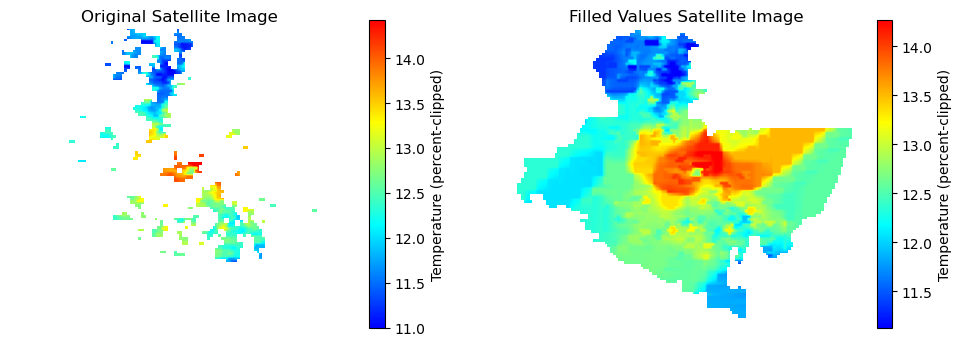

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# plot original image
src, band, profile, nodata_value = read_tiff(DATA_PATH / 'baghdad-temp-clipped/MODIS_LST_Day_2023_01_01.tif')
plot_raster_temp(band, percent_clip=0.5, ax=axes[0], title="Original Satellite Image")

# filled image
src, band_filled, profile, nodata_value = read_tiff(DATA_PATH / 'baghdad-temp-filled/baghdad_temp_2023-01-01_trimmed_to_baghdad.tif')
plot_raster_temp(band_filled, percent_clip=0.5, ax=axes[1], title="Filled Values Satellite Image")

plt.show()

Animation:

Before filling

Scanning percentiles: 100%|██████████| 731/731 [00:01<00:00, 420.88it/s]


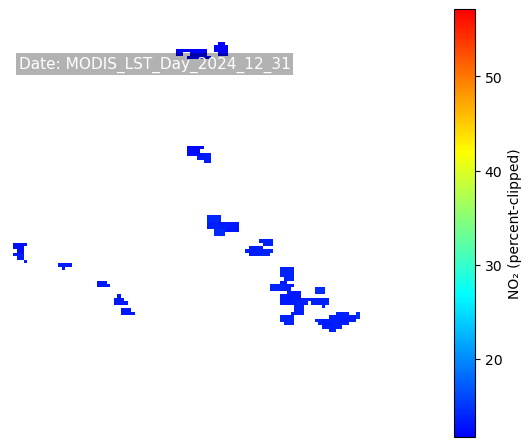

Animation saved to: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\animation-output\baghdad-temp-animation.gif


In [ ]:
# Use the existing pathlib.WindowsPath variable for the directory
baghdad_temp_tif_dir_clip = DATA_PATH / 'baghdad-temp-clipped'   
tiff_2_gif(baghdad_temp_tif_dir_clip, output_path=DATA_PATH, output_name="baghdad-temp-animation", fps=8)

After data filling

Aggregate

In [ ]:
# Aggregate Iraq - Baghdad
baghdad_temp_tif_dir = DATA_PATH / 'baghdad-temp-filled'  
aggregate_data(
    data_tiff_path=baghdad_temp_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="temp_mean"
    )

**Visualisation**

Show aggregated result in 2023-01-01 in Baghdad.

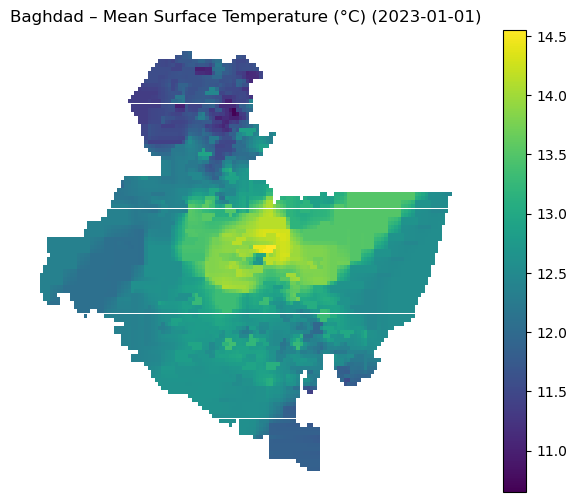

<Axes: title={'center': 'Baghdad – Mean Surface Temperature (°C) (2023-01-01)'}>

In [ ]:
# plot the aggregated data
gdf_bag = gpd.read_file(DATA_PATH / "baghdad-mesh-data/baghdad-2023-01-01.gpkg")
plot_mesh(
    mesh    = gdf_bag,
    feature = "temp_mean",
    title   = "Baghdad - Mean Surface Temperature (°C) (2023-01-01)",
    show_edges=False
)

## 6 Traffic Congestion Index (TCI)

#### Iraq - Baghdad

In [ ]:
from helpercollections import fill_tci_to_gpkg

baghdad_tci_path = DATA_PATH / 'baghdad-TCI'
gpkg_folder = DATA_PATH / 'baghdad-empty-mesh-data'
output_folder = DATA_PATH / 'baghdad-TCI-mesh-data'

fill_tci_to_gpkg(gpkg_folder, baghdad_tci_path, output_folder)

Visualisation

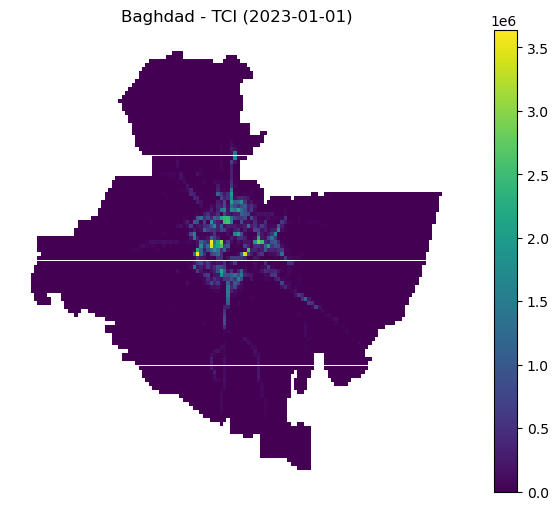

<Axes: title={'center': 'Baghdad - TCI (2023-01-01)'}>

In [10]:
baghdad_tci=DATA_PATH/'baghdad-mesh-processed-data/baghdad-2023-01-01.gpkg'
gdf_addis = gpd.read_file(baghdad_tci)


plot_mesh(
    mesh    = gdf_addis,
    feature = "TCI",
    title   = "Baghdad - TCI (2023-01-01)",
    show_edges=False
)

## 7 Distance from Primary Road

#### Ethiopia - Addis Ababa

In [ ]:
import fiona

addis_meshes_path = DATA_PATH / 'addis-mesh-data'       # path to folder storing Addis mesh files
mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"     # full path to Addis Ababa mesh grid file

In [3]:
# Load the shapefile containing road data
distance_from_road = gpd.read_file(DATA_PATH / "ethiopia-latest-free-shp" / "gis_osm_roads_free_1.shp")
distance_from_road

osm_id  code       fclass                      name   ref oneway  \
0          4677317  5122  residential                      None  None      B   
1          4677323  5122  residential                      None  None      B   
2          4677325  5122  residential                      None  None      B   
3          4677326  5122  residential                      None  None      B   
4          4677359  5113      primary  Equatorial Guinea Street  None      F   
...            ...   ...          ...                       ...   ...    ...   
429299  1388089328  5142        track                      None  None      B   
429300  1388089329  5122  residential                      None  None      B   
429301  1388089330  5122  residential                      None  None      B   
429302  1388092027  5115     tertiary                      None  None      B   
429303  1388092028  5115     tertiary                      None  None      B   

        maxspeed  layer bridge tunnel  \
0              0      0      F      F   
1              0      0      F      F   
2              0      0      F      F   
3              0      0      F      F   
4              0      0      F      F   
...          ...    ...    ...    ...   
429299         0      0      F      F   
429300         0      0      F      F   
429301         0      0      F      F   
429302         0      0      F      F   
429303         0      1      T      F   

                                                 geometry  
0       LINESTRING (38.79066 9.01506, 38.79124 9.01521...  
1       LINESTRING (38.7916 9.01134, 38.7917 9.01075, ...  
2       LINESTRING (38.79085 9.01426, 38.79143 9.01439...  
3       LINESTRING (38.79342 9.01705, 38.79353 9.01656...  
4       LINESTRING (38.79534 9.01767, 38.79556 9.01774...  
...                                                   ...  
429299  LINESTRING (37.17516 8.49314, 37.17431 8.4928,...  
429300  LINESTRING (37.17842 8.49781, 37.1783 8.49798,...  
429301  LINESTRING (37.18053 8.50078, 37.18058 8.50062...  
429302  LINESTRING (37.31346 8.471, 37.31346 8.47088, ...  
429303      LINESTRING (37.31345 8.47106, 37.31346 8.471)  

[429304 rows x 11 columns]

In [4]:
# Filter to keep only roads classified as 'primary'
primary_roads = distance_from_road[distance_from_road["fclass"] == "primary"]
primary_roads

osm_id  code   fclass                       name   ref oneway  \
4          4677359  5113  primary   Equatorial Guinea Street  None      F   
5          4677416  5113  primary    Ras Abebe Aregay Street  None      F   
6          4677442  5113  primary          Mozambique Street  None      F   
7          4677450  5113  primary                       None  None      F   
8          4677458  5113  primary                Chad Street  None      F   
...            ...   ...      ...                        ...   ...    ...   
425045  1355346497  5113  primary  Africa Avenue / Bole Road  None      F   
426296  1361480377  5113  primary                       None  None      F   
428917  1387067995  5113  primary                       None  None      B   
428986  1387206005  5113  primary  Wolayta Sodo - Shashamane    A7      B   
428987  1387206006  5113  primary  Wolayta Sodo - Shashamane    A7      B   

        maxspeed  layer bridge tunnel  \
4              0      0      F      F   
5              0      0      F      F   
6              0      0      F      F   
7              0      0      F      F   
8              0      0      F      F   
...          ...    ...    ...    ...   
425045         0      0      F      F   
426296         0      0      F      F   
428917         0      0      F      F   
428986        56      0      F      F   
428987        56      1      T      F   

                                                 geometry  
4       LINESTRING (38.79534 9.01767, 38.79556 9.01774...  
5       LINESTRING (38.75187 9.01668, 38.75149 9.01598...  
6       LINESTRING (38.74697 9.00274, 38.74692 9.00331...  
7       LINESTRING (38.74911 8.98538, 38.749 8.98558, ...  
8       LINESTRING (38.74412 9.0105, 38.74398 9.01048,...  
...                                                   ...  
425045  LINESTRING (38.78986 8.9887, 38.7895 8.98884, ...  
426296  LINESTRING (42.058 4.17747, 42.05794 4.17745, ...  
428917  LINESTRING (34.86937 8.69118, 34.86964 8.69094...  
428986  LINESTRING (37.87016 6.96844, 37.87371 6.97331...  
428987     LINESTRING (37.88617 7.0017, 37.88624 7.00178)  

[4900 rows x 11 columns]

In [5]:
# Read the mesh as a GeoDataFrame
mesh_addis_gdf = gpd.read_file(mesh_addis)

# Clip the primary roads using the mesh geometry
primary_roads_clipped = primary_roads.clip(mesh_addis_gdf.unary_union)

# Save the clipped primary roads to a new shapefile
primary_roads_clipped.to_file(DATA_PATH / "primary_roads_clipped.shp")

# Load the clipped primary roads shapefile
primary_roads_clipped = gpd.read_file(DATA_PATH / "primary_roads_clipped.shp")
primary_roads_clipped

C:\Users\26454\AppData\Local\Temp\ipykernel_50648\1010328856.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  primary_roads_clipped = primary_roads.clip(mesh_addis_gdf.unary_union)


osm_id  code   fclass                            name   ref oneway  \
0     1173253484  5113  primary            Hachalu hundesa road  None      F   
1      709881941  5113  primary                            None  None      F   
2     1173745436  5113  primary                            None  None      F   
3      709881940  5113  primary                            None  None      F   
4       95458351  5113  primary                            None  None      F   
...          ...   ...      ...                             ...   ...    ...   
2484   583090586  5113  primary                            None  None      F   
2485   350607292  5113  primary                            None  None      F   
2486   755468011  5113  primary  Fikre Mariam Aba Techan Street     1      F   
2487   755468020  5113  primary  Fikre Mariam Aba Techan Street     1      F   
2488   755468010  5113  primary  Fikre Mariam Aba Techan Street     1      F   

      maxspeed  layer bridge tunnel  \
0            0      0      F      F   
1            0      0      F      F   
2            0      0      F      F   
3            0      0      F      F   
4            0      0      F      F   
...        ...    ...    ...    ...   
2484         0      1      T      F   
2485         0      0      F      F   
2486         0      0      F      F   
2487         0      0      F      F   
2488         0      0      F      F   

                                               geometry  
0     LINESTRING (38.73312 8.93753, 38.73332 8.9375,...  
1        LINESTRING (38.73364 8.94821, 38.73382 8.9482)  
2     LINESTRING (38.7329 8.94829, 38.73324 8.94826,...  
3       LINESTRING (38.73376 8.94835, 38.73359 8.94836)  
4     LINESTRING (38.72653 8.94872, 38.72667 8.94876...  
...                                                 ...  
2484    LINESTRING (38.87156 9.00403, 38.87144 9.00408)  
2485  MULTILINESTRING ((38.8945 9.01058, 38.89454 9....  
2486  LINESTRING (38.8745 9.05778, 38.87435 9.05772,...  
2487     LINESTRING (38.87456 9.0577, 38.87469 9.05775)  
2488  LINESTRING (38.87463 9.05782, 38.87457 9.05781...  

[2489 rows x 11 columns]

In [6]:
# Convert both GeoDataFrames to UTM zone 37N (Ethiopia)
mesh_utm = mesh_addis_gdf.to_crs(epsg=32637)
roads_utm = primary_roads_clipped.to_crs(epsg=32637)

# Calculate the distance from each mesh cell to the nearest primary road (in meters)
mesh_utm["distance_to_primary_road_meters"] = mesh_utm.geometry.apply(
    lambda x: roads_utm.distance(x).min()
)
# Save the updated mesh with distance to primary road to a new GPKG file
mesh_utm.to_file(DATA_PATH / "addis-mesh-with-primary-road-distance.gpkg", driver="GPKG")

# Load the updated mesh with distance to primary road
addis_mesh_with_road_distance = gpd.read_file(DATA_PATH / "addis-mesh-with-primary-road-distance.gpkg")

# Remove the 'geometry' column from the GeoDataFrame
addis_mesh_with_road_distance = addis_mesh_with_road_distance.drop(columns=["geometry"])

# Create a column with binary values indicating whether cell has primary road inside it or not
addis_mesh_with_road_distance["with_primary_road"] = addis_mesh_with_road_distance["distance_to_primary_road_meters"].apply(
    lambda x: 1 if x == 0 else 0
)
addis_mesh_with_road_distance

geom_id  distance_to_primary_road_meters  with_primary_road
0          0                      1445.265329                  0
1          1                       867.437907                  0
2          2                       280.031780                  0
3          3                         0.000000                  1
4          4                         0.000000                  1
..       ...                              ...                ...
541      541                         0.000000                  1
542      542                         0.000000                  1
543      543                         0.000000                  1
544      544                       883.343165                  0
545      545                         0.000000                  1

[546 rows x 3 columns]

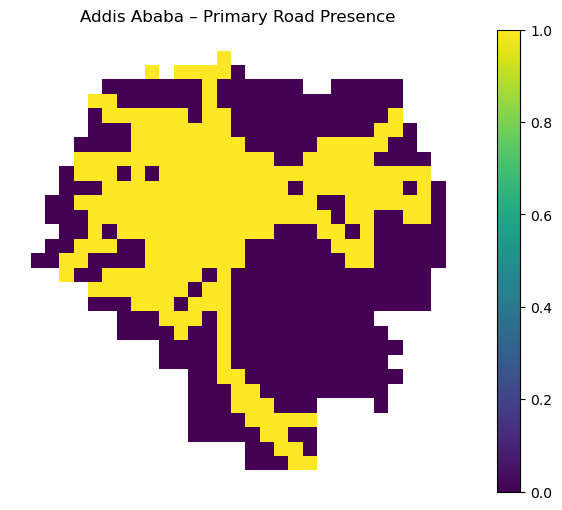

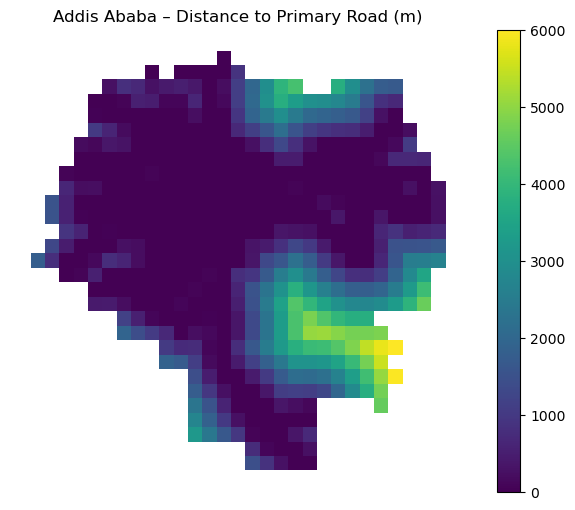

<Axes: title={'center': 'Addis Ababa – Distance to Primary Road (m)'}>

In [14]:
# Merge the 'with_primary_road' column into the mesh GeoDataFrame for plotting
mesh_plot = mesh_addis_gdf.merge(
    addis_mesh_with_road_distance[["geom_id", "with_primary_road", "distance_to_primary_road_meters"]],
    on="geom_id"
)

# Visualize the mesh with "with_primary_road" feature
plot_mesh(
    mesh=mesh_plot,
    feature="with_primary_road",
    title="Addis Ababa – Primary Road Presence",
    figsize=(8, 6),
    show=True,
    show_edges=False
)

# Visualize the distance to primary road
plot_mesh(
    mesh=mesh_plot,
    feature="distance_to_primary_road_meters",
    title="Addis Ababa – Distance to Primary Road (m)",
    figsize=(8, 6),
    show=True,
    show_edges=False
)

## 8 Land Cover Data 

**Ground-cover gaps.**

Ground cover category is a qualitative label—such as vegetation, urban area, or water bodies. For any missing pixel, we determine which ground cover label appears most frequently among the surrounding mesh cells. This majority label is then assigned to the missing pixel.

### 8.1 ESA data

#### Ethiopia - Addis Ababa

In [ ]:
from datetime import date
# Step 1: Clip and merge land cover raster tiles using VRT
esa_folder = DATA_PATH / "Land Cover/Addis _Ababa_ESA_WORLDCOVER_10M_2021_V200"
esa_tiles = [
    esa_folder / "ESA_WorldCover_10m_2021_v200_N06E036_Map.tif",
    esa_folder / "ESA_WorldCover_10m_2021_v200_N06E039_Map.tif",
    esa_folder / "ESA_WorldCover_10m_2021_v200_N09E036_Map.tif",
    esa_folder / "ESA_WorldCover_10m_2021_v200_N09E039_Map.tif"
]

shapefile_path = DATA_PATH / "demo-data/addis-ababa-boundary/addis-ababa-adm1.shp"
clipped_tiff = DATA_PATH / "Land Cover/esa_addis_ababa_clipped.tif"

clip_raster_with_shapefile_vrt(
    input_tiff_list=esa_tiles,
    shapefile=shapefile_path,
    output_tiff=clipped_tiff,
    nodata_value=255
)

# Step 2: Fill nodata with categorical mode
filled_tiff = DATA_PATH / "Land Cover/esa_addis_ababa_filled.tif"
fill_landcover_data(
    input_tiff_path=clipped_tiff,
    output_tiff_path=filled_tiff,
    default_nodata=255
)


# Step 3: Aggregate land cover AREA (not mode) to mesh
mesh_path = DATA_PATH / "Land Cover/addis-ababa-2023-01-01.gpkg"
aggregate_landcover_area_to_mesh(
    mesh_path=mesh_path,
    filled_raster=filled_tiff,
    output_layer="LandCover_2023",
    pixel_area=100  # 10m x 10m pixels
)


/Users/JiaSyuan/anaconda3/envs/geoenv/lib/python3.10/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'addis-ababa-2023-01-01.gpkg': 'grid_addis_ababa' (default), 'LandCover_2023'. Specify layer parameter to avoid this warning.
  result = read_func(


Land cover area written to layer: LandCover_2023


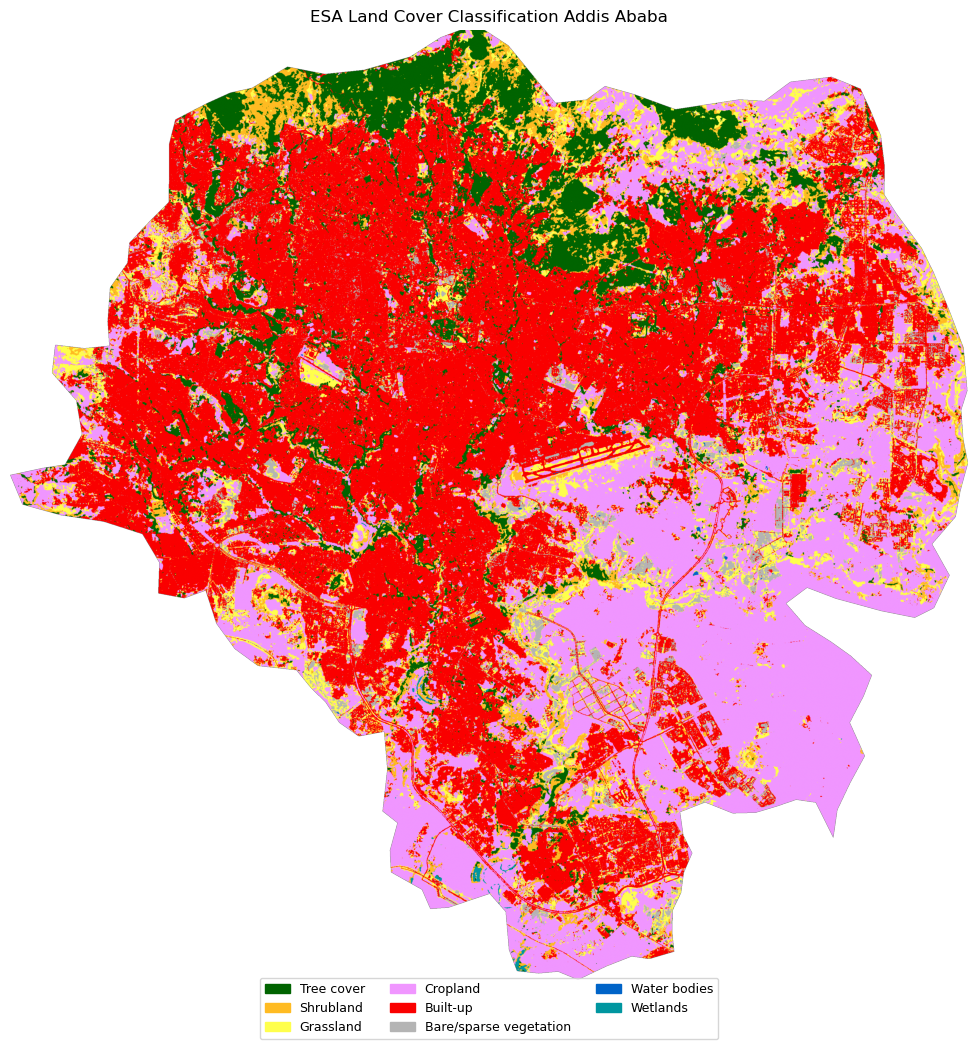

In [6]:

# Step 4: Plot with legend
class_values, class_names, cmap, norm = get_esa_landcover_colormap()
plot_landcover_legend_map(
    tiff_path=clipped_tiff,
    class_values=class_values,
    class_names=class_names,
    cmap=cmap,
    norm=norm,
    title="ESA Land Cover Classification Addis Ababa"
)


In [ ]:

# Step 5: Generate daily landcover GPKG files
source_path = DATA_PATH / "Land Cover"
original_gpkg = source_path / "addis-ababa-2023-01-01.gpkg"
layer_to_keep = "landcover_2023"
renamed_layer = "landcover"

output_folder = DATA_PATH / "addis-ababa-ESA-landcover"
output_folder.mkdir(parents=True, exist_ok=True)

gdf = gpd.read_file(original_gpkg, layer=layer_to_keep)
temp_gpkg = output_folder / "template_landcover.gpkg"
gdf.to_file(temp_gpkg, layer=renamed_layer, driver="GPKG")

start_date = date(2023, 1, 1)
end_date = date(2024, 12, 31)
date_list = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

for d in date_list:
    fname = f"addis-ababa-{d}.gpkg"
    shutil.copy(temp_gpkg, output_folder / fname)

print(f"Total {len(date_list)} files created in: {output_folder}")

Total 731 files created in: /Users/JiaSyuan/GitProjects/air-pollution-mobility-research-project/data/addis-ababa-ESA-landcover


#### Iraq - Baghdad

/Users/JiaSyuan/anaconda3/envs/geoenv/lib/python3.10/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'baghdad-2023-01-01.gpkg': 'grid_badhdad' (default), 'LandCover_2023'. Specify layer parameter to avoid this warning.
  result = read_func(


Land cover area written to layer: LandCover_2023


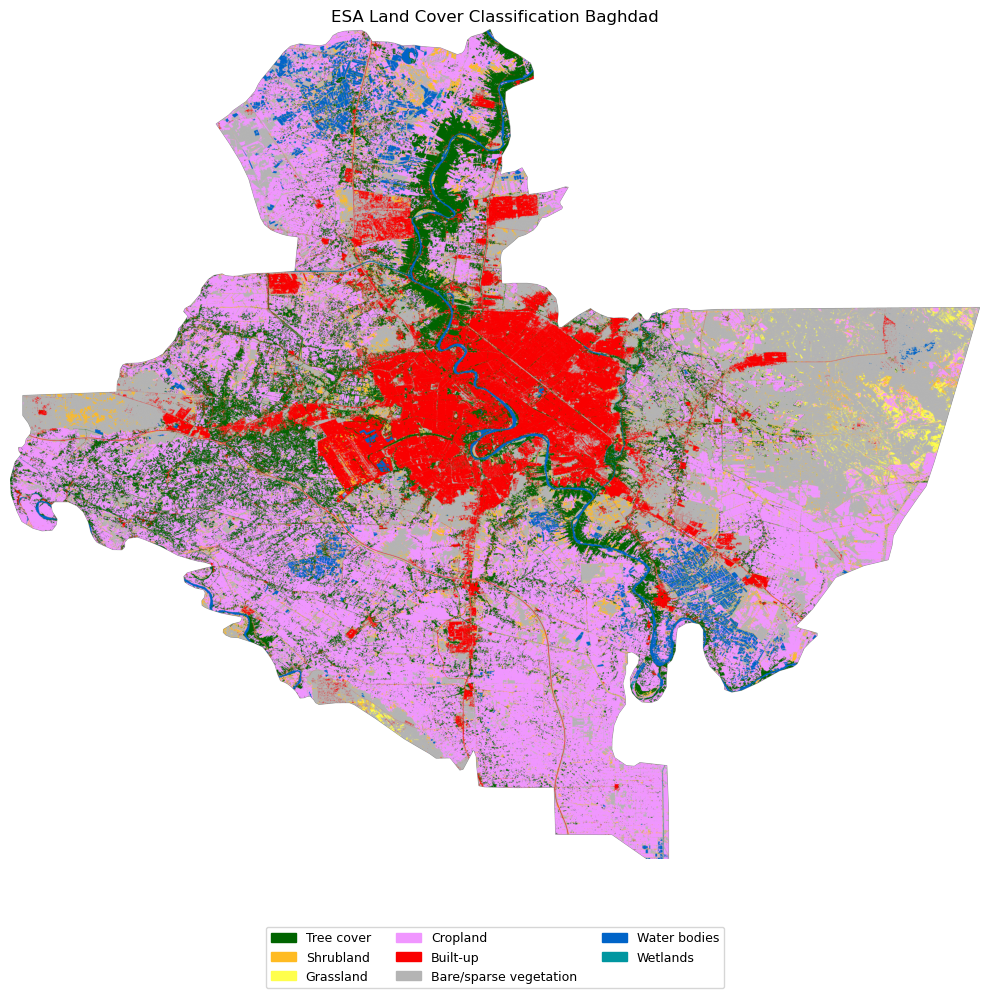

Total 731 files created in: /Users/JiaSyuan/GitProjects/air-pollution-mobility-research-project/data/baghdad-ESA-landcover


In [ ]:
# Step 1: Clip and merge land cover raster tiles using VRT
esa_folder = DATA_PATH / "Land Cover/Baghdad_ESA_WORLDCOVER_10M_2021_V200"
esa_tiles = [
    esa_folder / "ESA_WorldCover_10m_2021_v200_N30E039_Map.tif",
    esa_folder / "ESA_WorldCover_10m_2021_v200_N30E042_Map.tif",
    esa_folder / "ESA_WorldCover_10m_2021_v200_N30E045_Map.tif",
    esa_folder / "ESA_WorldCover_10m_2021_v200_N33E039_Map.tif",
    esa_folder / "ESA_WorldCover_10m_2021_v200_N33E042_Map.tif",
    esa_folder / "ESA_WorldCover_10m_2021_v200_N33E045_Map.tif"
]

shapefile_path = DATA_PATH / "demo-data/baghdad-boundary/baghdad-adm1.shp"
clipped_tiff = DATA_PATH / "Land Cover/esa_baghdad_clipped.tif"

clip_raster_with_shapefile_vrt(
    input_tiff_list=esa_tiles,
    shapefile=shapefile_path,
    output_tiff=clipped_tiff,
    nodata_value=255
)

# Step 2: Fill nodata with categorical mode
filled_tiff = DATA_PATH / "Land Cover/esa_baghdad_filled.tif"
fill_landcover_data(
    input_tiff_path=clipped_tiff,
    output_tiff_path=filled_tiff,
    default_nodata=255
)

# Step 3: Aggregate land cover AREA (not mode) to mesh
mesh_path = DATA_PATH / "Land Cover/baghdad-2023-01-01.gpkg"
aggregate_landcover_area_to_mesh(
    mesh_path=mesh_path,
    filled_raster=filled_tiff,
    output_layer="LandCover_2023",
    pixel_area=100  # 10m x 10m pixels
)

# Step 4: Plot with legend
class_values, class_names, cmap, norm = get_esa_landcover_colormap()
plot_landcover_legend_map(
    tiff_path=clipped_tiff,
    class_values=class_values,
    class_names=class_names,
    cmap=cmap,
    norm=norm,
    title="ESA Land Cover Classification Baghdad"
)

# Step 5: Generate daily landcover GPKG files
source_path = DATA_PATH / "Land Cover"
original_gpkg = source_path / "baghdad-2023-01-01.gpkg"
layer_to_keep = "landcover_2023"
renamed_layer = "landcover"

output_folder = DATA_PATH / "baghdad-ESA-landcover"
output_folder.mkdir(parents=True, exist_ok=True)

gdf = gpd.read_file(original_gpkg, layer=layer_to_keep)
temp_gpkg = output_folder / "template_landcover.gpkg"
gdf.to_file(temp_gpkg, layer=renamed_layer, driver="GPKG")

start_date = date(2023, 1, 1)
end_date = date(2024, 12, 31)
date_list = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

for d in date_list:
    fname = f"baghdad-{d}.gpkg"
    shutil.copy(temp_gpkg, output_folder / fname)

print(f"Total {len(date_list)} files created in: {output_folder}")


### 8.2 MODIS data

#### Ethiopia - Addis Ababa

[Saved] LandCover_2023 written to: /Users/JiaSyuan/GitProjects/air-pollution-mobility-research-project/data/Land Cover/addis-ababa-2023-01-01.gpkg


/Users/JiaSyuan/anaconda3/envs/geoenv/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


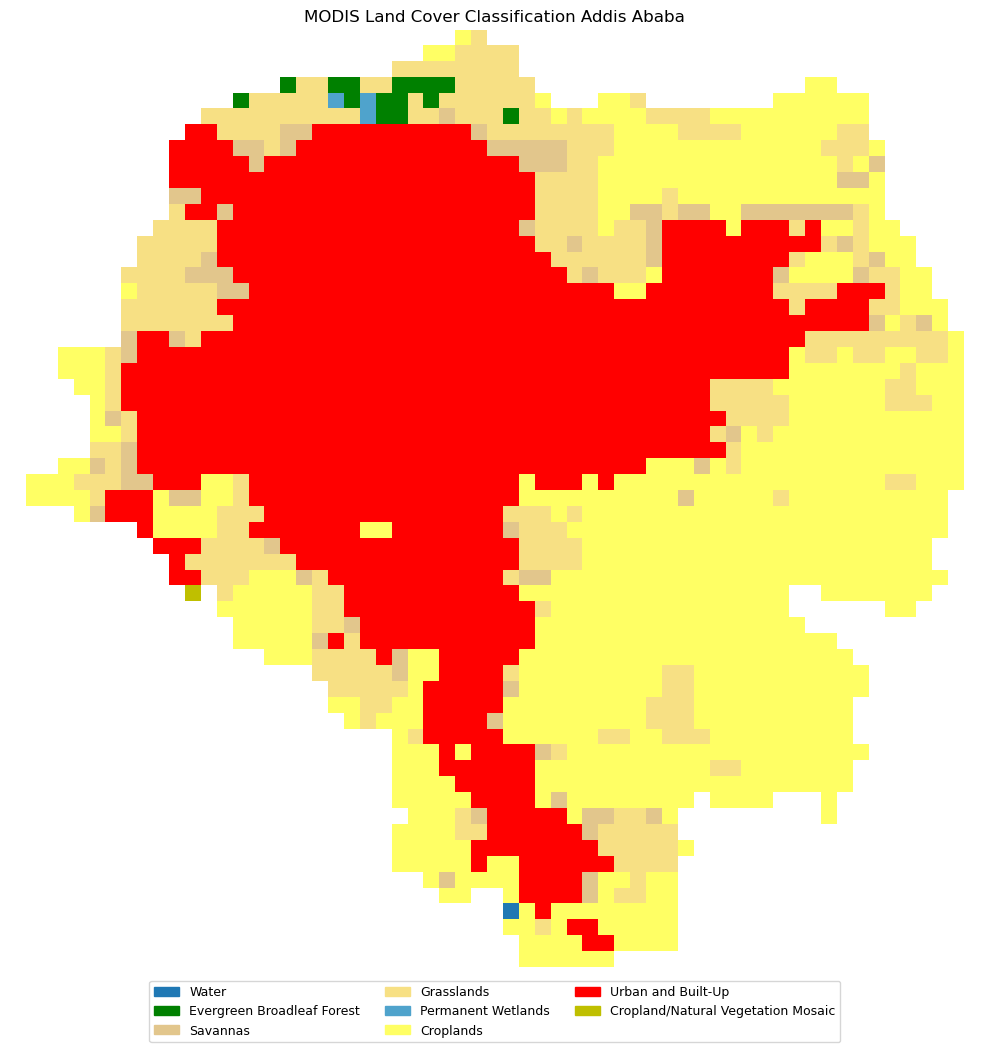

In [8]:
# Step 1: Clip land cover raster
input_tiff = DATA_PATH / "Land Cover/modis_lc_2023_addis_ababa.tif"
shapefile_path = DATA_PATH / "demo-data/addis-ababa-boundary/addis-ababa-adm1.shp"
clipped_tiff = DATA_PATH / "Land Cover/modis_lc_2023_addis_ababa_clipped.tif"

clip_raster_with_shapefile(
    input_tiff=input_tiff,
    shapefile=shapefile_path,
    output_tiff=clipped_tiff,
    nodata_value=255
)

# Step 2: Fill nodata with categorical mode
filled_tiff = DATA_PATH / "Land Cover/modis_lc_2023_addis_ababa_filled.tif"
fill_landcover_data(
    input_tiff_path=clipped_tiff,
    output_tiff_path=filled_tiff,
    default_nodata=255
)

# Step 3: Aggregate land cover to mesh
aggregate_landcover_to_mesh(
    mesh_path=DATA_PATH / "Land Cover/addis-ababa-2023-01-01.gpkg",
    filled_raster=filled_tiff,
    output_layer="LandCover_2023",
    column_name="landcover_2023",
    nodata_value=255,
    layer_name="grid_addis_ababa"
)


# Step 4: Plot with legend
class_values, class_names, cmap, norm = get_modis_landcover_colormap()
plot_landcover_legend_map(
    tiff_path=clipped_tiff,
    class_values=class_values,
    class_names=class_names,
    cmap=cmap,
    norm=norm,
    title="MODIS Land Cover Classification Addis Ababa"
)


In [ ]:

# Step 5: Generate daily landcover GPKG files


source_path = DATA_PATH / "Land Cover"
original_gpkg = source_path / "addis-ababa-2023-01-01.gpkg"
layer_to_keep = "landcover_2023"
renamed_layer = "landcover"

output_folder = DATA_PATH / "addis-ababa-landcover"
output_folder.mkdir(parents=True, exist_ok=True)

gdf = gpd.read_file(original_gpkg, layer=layer_to_keep)
temp_gpkg = output_folder / "template_landcover.gpkg"
gdf.to_file(temp_gpkg, layer=renamed_layer, driver="GPKG")

start_date = date(2023, 1, 1)
end_date = date(2024, 12, 31)
date_list = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

for d in date_list:
    fname = f"addis-ababa-{d}.gpkg"
    shutil.copy(temp_gpkg, output_folder / fname)

print(f"Total {len(date_list)} files created in: {output_folder}")

#### Iraq - Baghdad

/Users/JiaSyuan/anaconda3/envs/geoenv/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


[Saved] LandCover_2023 written to: /Users/JiaSyuan/GitProjects/air-pollution-mobility-research-project/data/Land Cover/baghdad-2023-01-01.gpkg


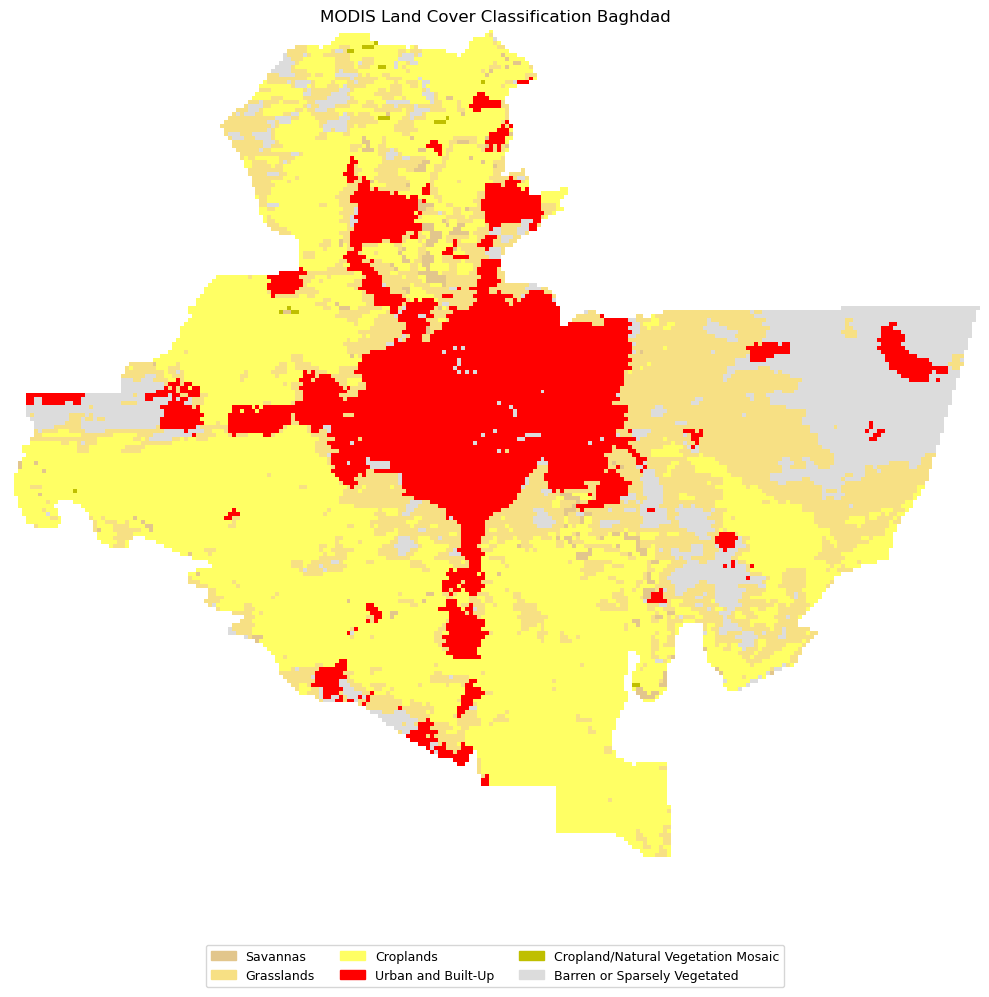

In [11]:
# Step 1: Clip land cover raster
input_tiff = DATA_PATH / "Land Cover/modis_lc_2023_baghdad.tif"
shapefile_path = DATA_PATH / "demo-data/baghdad-boundary/baghdad-adm1.shp"
clipped_tiff = DATA_PATH / "Land Cover/modis_lc_2023_baghdad_clipped.tif"

clip_raster_with_shapefile(
    input_tiff=input_tiff,
    shapefile=shapefile_path,
    output_tiff=clipped_tiff,
    nodata_value=255
)

# Step 2: Fill nodata with categorical mode
filled_tiff = DATA_PATH / "Land Cover/modis_lc_2023_baghdad_filled.tif"
fill_landcover_data(
    input_tiff_path=clipped_tiff,
    output_tiff_path=filled_tiff,
    default_nodata=255
)

# Step 3: Aggregate land cover to mesh
aggregate_landcover_to_mesh(
    mesh_path=DATA_PATH / "Land Cover/baghdad-2023-01-01.gpkg",
    filled_raster=filled_tiff,
    output_layer="LandCover_2023",
    column_name="landcover_2023",
    nodata_value=255,
    layer_name="grid_badhdad"
)

# Step 4: Plot with legend
class_values, class_names, cmap, norm = get_modis_landcover_colormap()
plot_landcover_legend_map(
    tiff_path=clipped_tiff,
    class_values=class_values,
    class_names=class_names,
    cmap=cmap,
    norm=norm,
    title="MODIS Land Cover Classification Baghdad"
)


In [ ]:

# Step 5: Generate daily landcover GPKG files
source_path = DATA_PATH / "Land Cover"
original_gpkg = source_path / "baghdad-2023-01-01.gpkg"
layer_to_keep = "landcover_2023"
renamed_layer = "landcover"

output_folder = DATA_PATH / "baghdad-landcover"
output_folder.mkdir(parents=True, exist_ok=True)

gdf = gpd.read_file(original_gpkg, layer=layer_to_keep)
temp_gpkg = output_folder / "template_landcover.gpkg"
gdf.to_file(temp_gpkg, layer=renamed_layer, driver="GPKG")

start_date = date(2023, 1, 1)
end_date = date(2024, 12, 31)
date_list = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

for d in date_list:
    fname = f"baghdad-{d}.gpkg"
    shutil.copy(temp_gpkg, output_folder / fname)

print(f"Total {len(date_list)} files created in: {output_folder}")

## 9 Land uses (OSM) and Land Cover (ESA) Validation

The first code cell runs the validation pipeline and summarizes the error metrics. 
It begins by ensuring that the src/ directory is correctly included in the Python path so that the new validation functions can be imported. 
It then executes the full validation process for both Addis Ababa and Baghdad. 
This process involves reading each daily GeoPackage for both cities, merging the OSM and ESA datasets, computing the difference between the built-up areas reported by each source, and saving the cleaned and filtered output files to the appropriate folders. 

After processing all dates, the cell reloads the merged data in memory to calculate the average absolute and relative errors per day. Finally, it computes and prints a summary table that shows the average validation error for each city across the full two-year time span.

In [1]:
import sys
from pathlib import Path

NOTEBOOK_PATH = Path().resolve()
REPO_PATH     = NOTEBOOK_PATH.parent
if str(REPO_PATH) not in sys.path:
    sys.path.insert(0, str(REPO_PATH))

# 2) Now import cleanly from src/validation
from src.validation import process_city, merge_meshes, CITY_CONFIG
import pandas as pd


SRC_PATH      = REPO_PATH / "src"
if str(SRC_PATH) not in sys.path:
    sys.path.append(str(SRC_PATH))

# ─ run the full batch for both cities ─────────────────────────────────────────
for city in CITY_CONFIG:
    print(f">>> Processing validation for {city.replace('-', ' ').title()} …")
    process_city(city, max_workers=4)

# ─ collect per-city average over all dates ────────────────────────────────────
rows = []
for city_key, cfg in CITY_CONFIG.items():
    osm_folder = cfg["osm_folder"]
    esa_folder = cfg["esa_folder"]
    for osm_fp in sorted(osm_folder.glob(f"{city_key}-*.gpkg")):
        esa_fp = esa_folder / osm_fp.name
        merged = merge_meshes(osm_fp, esa_fp)
        date_tag = osm_fp.stem.replace(f"{city_key}-", "")
        rows.append({
            "City": city_key.replace("-", " ").title(),
            "Date": pd.to_datetime(date_tag),
            "Avg Abs Error (m²)": merged["abs_err"].mean(),
            "Avg Rel Error (%)": merged["rel_err"].mean() * 100
        })

df_errors = pd.DataFrame(rows)
summary = df_errors.groupby("City")[["Avg Abs Error (m²)", "Avg Rel Error (%)"]].mean().round(2)
print("\n▶︎ Average error per city over all dates:")
display(summary)

>>> Processing validation for Addis Ababa …
>>> Processing validation for Baghdad …

▶︎ Average error per city over all dates:


Avg Abs Error (m²)  Avg Rel Error (%)
City                                              
Addis Ababa           208573.74              99.62
Baghdad                91903.42             303.41

OSM’s land-use tags provide a workable proxy for ESA’s built-up layer. For Addis Ababa the OSM sum of residential + commercial + industrial area is only about 0.21 km² larger than ESA on average, meaning the two sources line up to the same order of magnitude across the grid. For Baghdad the absolute gap is even smaller—≈ 0.09 km²—and the high percentage error simply reflects that ESA records a slightly smaller built-up baseline there. In short, OSM categories capture the built footprint well enough for our analyses; a simple scaling or calibration step will bring them into near alignment with ESA.

##### Visualization

The second cell focuses on visualizing spatial error for a single selected date, in this case, January 1st, 2023. It loads the OSM and ESA data for that specific date for each city, performs the merging step to compute the relative error (rel_err), and then uses the existing plot_mesh() visualization function to produce a map. These maps show how the relative error varies across the grid cells of each city, helping to identify areas where discrepancies between OSM and ESA built-up area classifications are highest. This spatial perspective is useful for assessing the geographic consistency of the validation process.

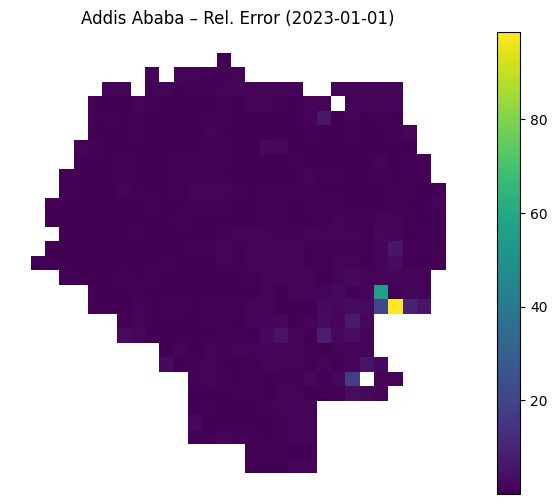

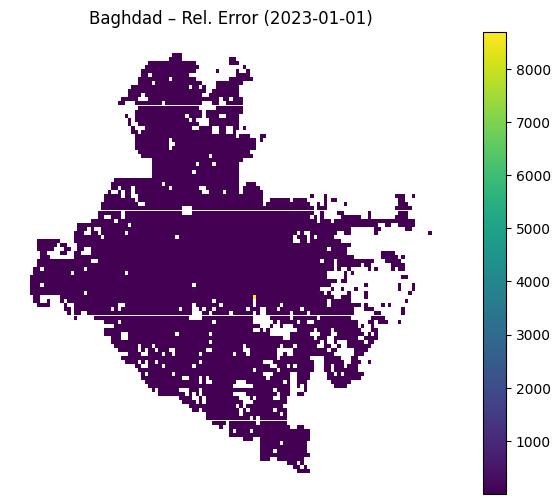

In [3]:
from src.validation import merge_meshes, CITY_CONFIG
from src.visualization import plot_mesh

DATE_TAG = "2023-01-01"

for city_key, cfg in CITY_CONFIG.items():
    osm_fp = cfg["osm_folder"] / f"{city_key}-{DATE_TAG}.gpkg"
    esa_fp = cfg["esa_folder"] / osm_fp.name

    merged = merge_meshes(osm_fp, esa_fp)

    plot_mesh(
        mesh       = merged,
        feature    = "rel_err",
        title      = f"{city_key.replace('-', ' ').title()} – Rel. Error ({DATE_TAG})",
        figsize    = (8, 6),
        show       = True,
        show_edges = False  # keep or drop as you prefer
    )


White cells = ESA reports zero built-up area, so relative error is undefined (we mask those to keep results honest).

Addis Ababa: colour scale tops out near 100 %; only a few isolated pixels show large differences, confirming that OSM’s residential + commercial + industrial tags closely track ESA’s built-up footprint.

Baghdad: scale stretches into the thousands % because many ESA cells contain only a few m² of built area—any small absolute gap looks huge when expressed as a percentage. Crucially, the absolute difference remains small (≈ 0.09 km² on average).

Bottom line: after excluding no-data cells, OSM land-use categories provide a reliable proxy for built-up area in both cities; remaining gaps are minor and can be reconciled with a simple scaling factor.